In [2]:
"""import kagglehub
from scipy.io import loadmat
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("inancigdem/eeg-data-for-mental-attention-state-detection")

print("Path to dataset files:", path)

# Collect all file names
file_names = []
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        file_names.append(os.path.join(dirname, filename))"""

'import kagglehub\nfrom scipy.io import loadmat\nimport os\nimport matplotlib.pyplot as plt\nimport pandas as pd\nimport numpy as np\n\n# Download latest version\npath = kagglehub.dataset_download("inancigdem/eeg-data-for-mental-attention-state-detection")\n\nprint("Path to dataset files:", path)\n\n# Collect all file names\nfile_names = []\nfor dirname, _, filenames in os.walk(path):\n    for filename in filenames:\n        file_names.append(os.path.join(dirname, filename))'

# Load data

In [1]:
from scipy.io import loadmat
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [28]:
path = '../Data'

# Collect all file names
file_names = []
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('.mat'):
            file_names.append(os.path.join(dirname, filename))
        
# Sắp xếp file theo số thứ tự (để đảm bảo đúng thứ tự subject)
file_names.sort(key=lambda x: int(x.split('eeg_record')[-1].split('.mat')[0]))

In [25]:
def load_data(file_name):
    try:
        mat = loadmat(file_name)
    except Exception as e:
        print(f"Lỗi khi đọc file '{file_name}': {e}")
        return None, None

    if 'o' not in mat:
        print(f"File '{file_name}' không chứa đối tượng 'o'.")
        return None, None

    mdata = mat['o']
    sampFreq = int(mdata['sampFreq'][0][0][0][0])  # Tần số lấy mẫu
    data = mdata['data'][0, 0]  # Dữ liệu đầy đủ

    # Lấy tín hiệu từ các kênh 4-17
    eeg_data = data[:, 3:17]
    print(f"File: {file_name}, Shape of selected EEG data: {eeg_data.shape}")

    return data, eeg_data


In [19]:
# Hàm đọc dữ liệu 
def load_data(file_name):
    mat = loadmat(file_name)

    # Trích xuất dữ liệu từ đối tượng 'o'
    mdata = mat['o']
    sampFreq = int(mdata['sampFreq'][0][0][0][0])  # Tần số lấy mẫu
    data = mdata['data'][0, 0]  # Dữ liệu đầy đủ

    # Lấy tín hiệu từ các kênh 4–17
    eeg_data = data[:, 3:17]
    print(f"File: {file_name}, Shape of selected EEG data: {eeg_data.shape}")

    return data, eeg_data

In [27]:
for file_name in file_names:
    print(f"Đang xử lý file: {file_name}")
    try:
        data, eeg_data = load_data(file_name)
    except Exception as e:
        print(f"Lỗi khi đọc file '{file_name}': {e}")
        continue

    # Kiểm tra nếu dữ liệu là None
    if data is None or eeg_data is None:
        print(f"Lỗi khi đọc dữ liệu từ file '{file_name}': Dữ liệu trả về là None.")
        continue

    # Kiểm tra kích thước dữ liệu
    if eeg_data.size == 0:
        print(f"Dữ liệu từ file '{file_name}' là rỗng.")
        continue

    print(f"Dữ liệu từ file '{file_name}' đã được đọc thành công với kích thước: {eeg_data.shape}")


In [4]:
def load_eeg_data(file_names, subject_map=None):
    all_data = []
    for file_name in file_names:
        # Lấy Trial ID từ tên file
        trial_id = int(file_name.split('eeg_record')[-1].split('.mat')[0])

        # Nếu subject_map được cung cấp, kiểm tra xem trial_id có nằm trong subject_map không
        if subject_map is not None:
            subject_id = None
            for subject, trials in subject_map.items():
                if trial_id in trials:
                    subject_id = subject
                    break

            # Nếu trial_id không nằm trong subject_map, bỏ qua file này
            if subject_id is None:
                continue

        try:
            print(f"Đang xử lý file: {file_name}, Trial ID: {trial_id}")
            data, eeg_data = load_data(file_name)

            # Kiểm tra kích thước dữ liệu trả về
            if eeg_data is not None and eeg_data.size > 0:
                all_data.append(eeg_data)
            else:
                print(f"Dữ liệu EEG từ file {file_name} không hợp lệ hoặc rỗng.")
        except Exception as e:
            print(f"Lỗi khi xử lý file {file_name}: {e}")
    
    return all_data


# Full data

In [ ]:
full_data = load_eeg_data(file_names)
print(full_data)


[]


# Reduce data

* Bỏ 2 ngày đầu 

In [6]:
# Số tổng subject (5)
total_subjects = 5

# Tạo ánh xạ subject_map
subject_map = {}
for s in range(1, total_subjects + 1):
    a = int(7 * (s - 1)) + 3
    if s != 5: 
        b = a + 5
    else:
        b = a + 4  # Subject 5 có 4 trials
    subject_map[s] = [i for i in range(a, b)]

print("Ánh xạ subject_map:", subject_map)

Ánh xạ subject_map: {1: [3, 4, 5, 6, 7], 2: [10, 11, 12, 13, 14], 3: [17, 18, 19, 20, 21], 4: [24, 25, 26, 27, 28], 5: [31, 32, 33, 34]}


In [17]:
reduce_data = load_eeg_data(file_names, subject_map)
print(reduce_data)

[]


* Visualize data

In [14]:
# Phân tích dữ liệu
for i in range(1):  # Giả sử duyệt qua 1 file để trực quan hóa
    #data, eeg_data = load_data(file_names[i])

    try:
        data, eeg_data = load_data(file_names[i])
        if data is None or eeg_data is None:
            print(f"Lỗi: Không thể tải dữ liệu từ file '{file_names[i]}'.")
            continue
    except Exception as e:
        print(f"Lỗi khi xử lý file '{file_names[i]}': {e}")
        continue

    # Vẽ dữ liệu đầy đủ từ file
    print('Dữ liệu đầy đủ từ file {}:'.format(file_names[i]), data.shape)
    plt.figure(figsize=(10, 4))
    plt.plot(data)
    plt.title(f'Dữ liệu đầy đủ từ File {i + 1}')
    plt.xlabel('Samples')
    plt.ylabel('EEG Signal Amplitude')
    plt.show()

    # Vẽ dữ liệu từ các kênh 4-17
    print('\nDữ liệu EEG từ các kênh 4-17:', eeg_data.shape)
    plt.figure(figsize=(10, 4))
    plt.plot(full_data[0][:1000, :])  # Giả sử vẽ 1000 mẫu đầu tiên
    plt.title('Data EEG (Channel 4-17) from 1000 data')
    plt.xlabel('Samples')
    plt.ylabel('EEG Signal Amplitude')
    plt.show()


IndexError: list index out of range

In [ ]:
''' 
Combine data
'''

# Kết hợp dữ liệu từ tất cả các file thành một DataFrame duy nhất
if all_data:
    df = pd.concat(all_data, ignore_index=True)
    print("Dữ liệu đã được kết hợp thành công!")
    print(df['State'].value_counts())
    print(df['State_Code'].value_counts())
    print(df['Subject'].value_counts())

Dữ liệu đã được kết hợp thành công!
State
drowsy       5316584
focused      1843200
unfocused    1843200
Name: count, dtype: int64
State_Code
0.531707       1020
0.031277        984
1.032137        788
502.478699      788
857.275818      784
               ... 
2030.612305       4
1934.177856       4
844.788513        4
3412.956543       4
3374.415527       4
Name: count, Length: 77826, dtype: int64
Subject
Subject_3    1872140
Subject_2    1848160
Subject_5    1804932
Subject_1    1776340
Subject_4    1701412
Name: count, dtype: int64


In [9]:
'''# Phân tích dữ liệu từ 3 file đầu tiên
for i in ():
    record = loadmat(file_names[i])
    mdata = record['o']  # Đối tượng chính
    sample1 = {n: mdata[n][0, 0] for n in mdata.dtype.names}

    data = sample1['data']
    trials = sample1['trials']

    print('Dữ liệu từ file {}:'.format(file_names[i]), data.shape)
    plt.plot(data)
    plt.title(f'Dữ liệu đầy đủ từ File {i + 1}')
    plt.show()

    data_eeg = data[:, 3:17]
    print('\nDữ liệu EEG từ các kênh 4-17:', data_eeg.shape)
    plt.plot(data_eeg)
    plt.title(f'Dữ liệu EEG (Các kênh 4-17) từ File {i + 1}')
    plt.show()

    print('\nCác lần thử nghiệm:', trials.shape)
    print()'''

"# Phân tích dữ liệu từ 3 file đầu tiên\nfor i in ():\n    record = loadmat(file_names[i])\n    mdata = record['o']  # Đối tượng chính\n    sample1 = {n: mdata[n][0, 0] for n in mdata.dtype.names}\n\n    data = sample1['data']\n    trials = sample1['trials']\n\n    print('Dữ liệu từ file {}:'.format(file_names[i]), data.shape)\n    plt.plot(data)\n    plt.title(f'Dữ liệu đầy đủ từ File {i + 1}')\n    plt.show()\n\n    data_eeg = data[:, 3:17]\n    print('\nDữ liệu EEG từ các kênh 4-17:', data_eeg.shape)\n    plt.plot(data_eeg)\n    plt.title(f'Dữ liệu EEG (Các kênh 4-17) từ File {i + 1}')\n    plt.show()\n\n    print('\nCác lần thử nghiệm:', trials.shape)\n    print()"

Dữ liệu từ file ../Data\eeg_record3.mat: (357224, 25)


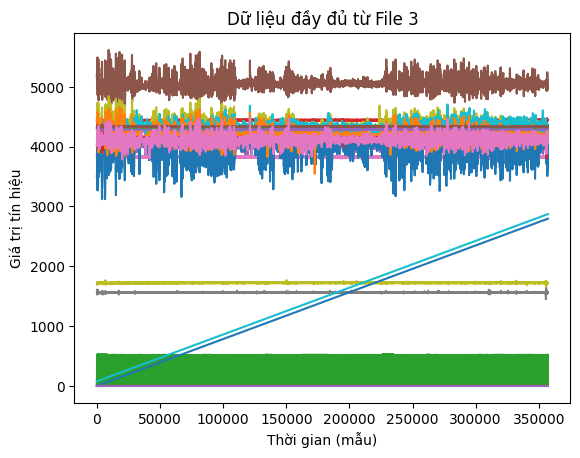


Dữ liệu EEG từ các kênh 4-17: (357224, 14)


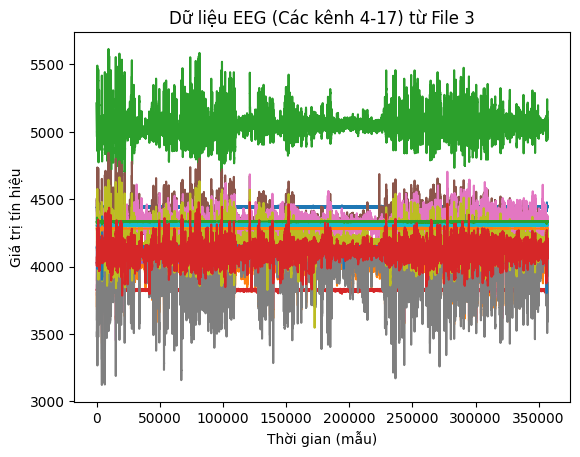


Các lần thử nghiệm: (1, 2, 14, 128)


In [10]:
# Phân tích dữ liệu từ file thứ 3
file_index = 2  # File thứ 3 (0-based index)
record = loadmat(file_names[file_index])
mdata = record['o']  # Đối tượng chính
sample1 = {n: mdata[n][0, 0] for n in mdata.dtype.names}

# Trích xuất dữ liệu và thông tin thử nghiệm
data = sample1['data']
trials = sample1['trials']

# Hiển thị thông tin và dữ liệu đầy đủ
print('Dữ liệu từ file {}:'.format(file_names[file_index]), data.shape)
plt.plot(data)
plt.title('Dữ liệu đầy đủ từ File 3')
plt.xlabel('Thời gian (mẫu)')
plt.ylabel('Giá trị tín hiệu')
plt.show()

# Trích xuất dữ liệu EEG từ các kênh 4-17
data_eeg = data[:, 3:17]
print('\nDữ liệu EEG từ các kênh 4-17:', data_eeg.shape)
plt.plot(data_eeg)
plt.title('Dữ liệu EEG (Các kênh 4-17) từ File 3')
plt.xlabel('Thời gian (mẫu)')
plt.ylabel('Giá trị tín hiệu')
plt.show()

# Hiển thị thông tin thử nghiệm
print('\nCác lần thử nghiệm:', trials.shape)


In [11]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,Time,State_Code,State,Subject
0,4440.512821,3804.102564,5210.769231,3829.230769,4030.25641,4490.769231,3862.051282,3511.794872,4321.025641,4304.615385,4141.025641,4282.564103,4333.846154,4024.102564,76.838,0.531707,focused,Subject_1
1,4440.512821,3796.410256,5205.641026,3827.179487,4030.25641,4489.230769,3858.461538,3505.128205,4311.794872,4304.615385,4144.615385,4282.564103,4335.384615,4017.948718,76.845,0.531707,focused,Subject_1
2,4440.512821,3798.974359,5207.179487,3827.692308,4030.25641,4489.230769,3865.128205,3511.794872,4313.846154,4304.615385,4148.717949,4282.564103,4334.871795,4018.974359,76.853,0.531707,focused,Subject_1
3,4440.512821,3801.538462,5210.256410,3830.769231,4030.25641,4490.256410,3866.153846,3511.282051,4315.897436,4304.615385,4146.666667,4282.564103,4334.358974,4022.051282,76.861,0.531707,focused,Subject_1
4,4440.512821,3799.487179,5210.256410,3831.794872,4030.25641,4490.256410,3865.641026,3506.153846,4311.282051,4304.615385,4145.641026,4282.564103,4333.846154,4020.512821,76.869,0.531707,focused,Subject_1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9002984 entries, 0 to 9002983
Data columns (total 18 columns):
 #   Column      Dtype  
---  ------      -----  
 0   AF3         float64
 1   F7          float64
 2   F3          float64
 3   FC5         float64
 4   T7          float64
 5   P7          float64
 6   O1          float64
 7   O2          float64
 8   P8          float64
 9   T8          float64
 10  FC6         float64
 11  F4          float64
 12  F8          float64
 13  AF4         float64
 14  Time        float64
 15  State_Code  float64
 16  State       object 
 17  Subject     object 
dtypes: float64(16), object(2)
memory usage: 1.2+ GB


In [13]:
describe_df = df.describe()
print(describe_df)

                AF3            F7            F3           FC5            T7  \
count  9.002984e+06  9.002984e+06  9.002984e+06  9.002984e+06  9.002984e+06   
mean   4.438423e+03  3.977449e+03  5.044796e+03  3.827884e+03  4.041375e+03   
std    1.591122e+01  5.038437e+01  7.829590e+01  3.705526e+00  4.954102e+00   
min    4.764103e+02  3.066667e+02  0.000000e+00  1.878462e+03  3.830769e+03   
25%    4.436410e+03  3.961026e+03  5.029231e+03  3.826154e+03  4.037949e+03   
50%    4.438974e+03  3.977949e+03  5.046154e+03  3.827692e+03  4.042564e+03   
75%    4.441026e+03  3.993846e+03  5.061538e+03  3.829744e+03  4.045128e+03   
max    7.060513e+03  7.808205e+03  8.401538e+03  5.400000e+03  4.515385e+03   

                 P7            O1            O2            P8            T8  \
count  9.002984e+06  9.002984e+06  9.002984e+06  9.002984e+06  9.002984e+06   
mean   4.317500e+03  4.283371e+03  4.028495e+03  4.164568e+03  4.307464e+03   
std    9.055210e+01  7.661124e+01  5.554116e+01  5.

In [14]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Khảo sát phân bố dữ liệu bằng biểu đồ
# plt.figure(figsize=(12, 6))
# sns.histplot(df, kde=True, bins=50, palette='viridis', element='step', alpha=0.6)
# plt.title('Distribution of EEG Data Across All Channels')
# plt.xlabel('Amplitude')
# plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()

In [15]:
# # Vẽ thêm box plot cho dữ liệu EEG
# plt.figure(figsize=(15, 8))
# sns.boxplot(data=df, palette='viridis')
# plt.title('Box Plot of EEG Data Across All Channels')
# plt.xlabel('Channels')
# plt.ylabel('Amplitude')
# plt.tight_layout()
# plt.show()

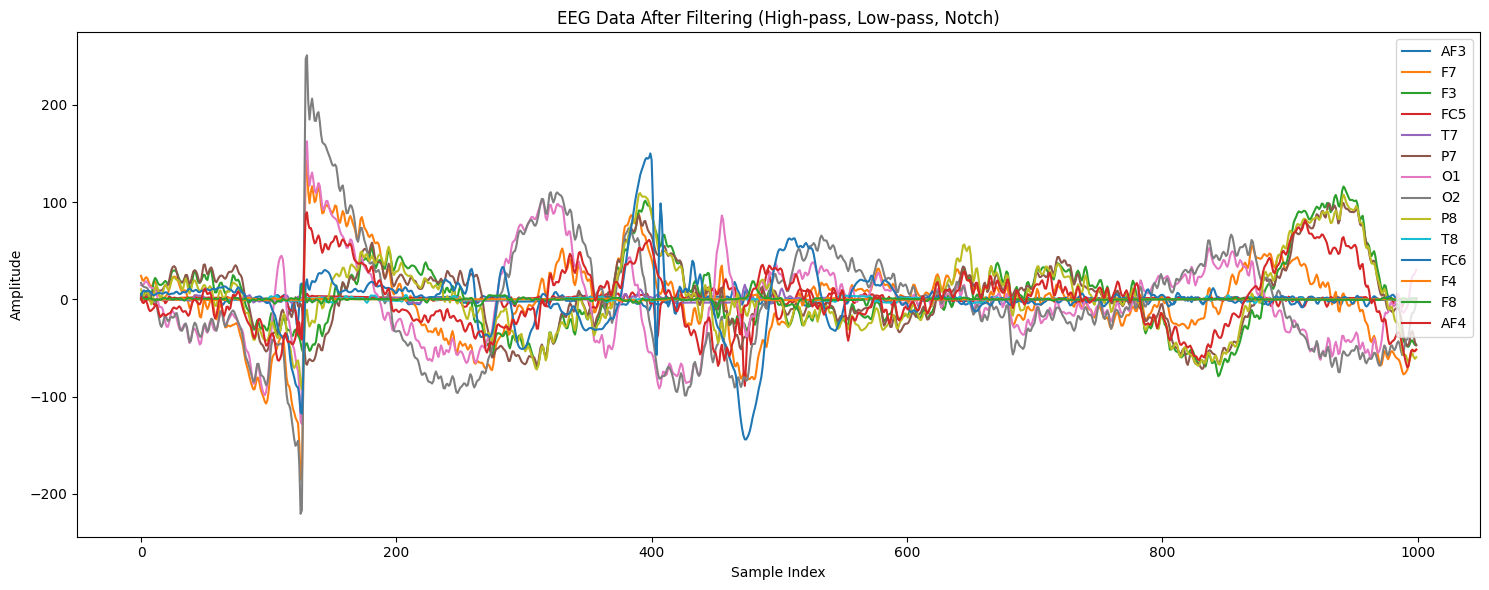

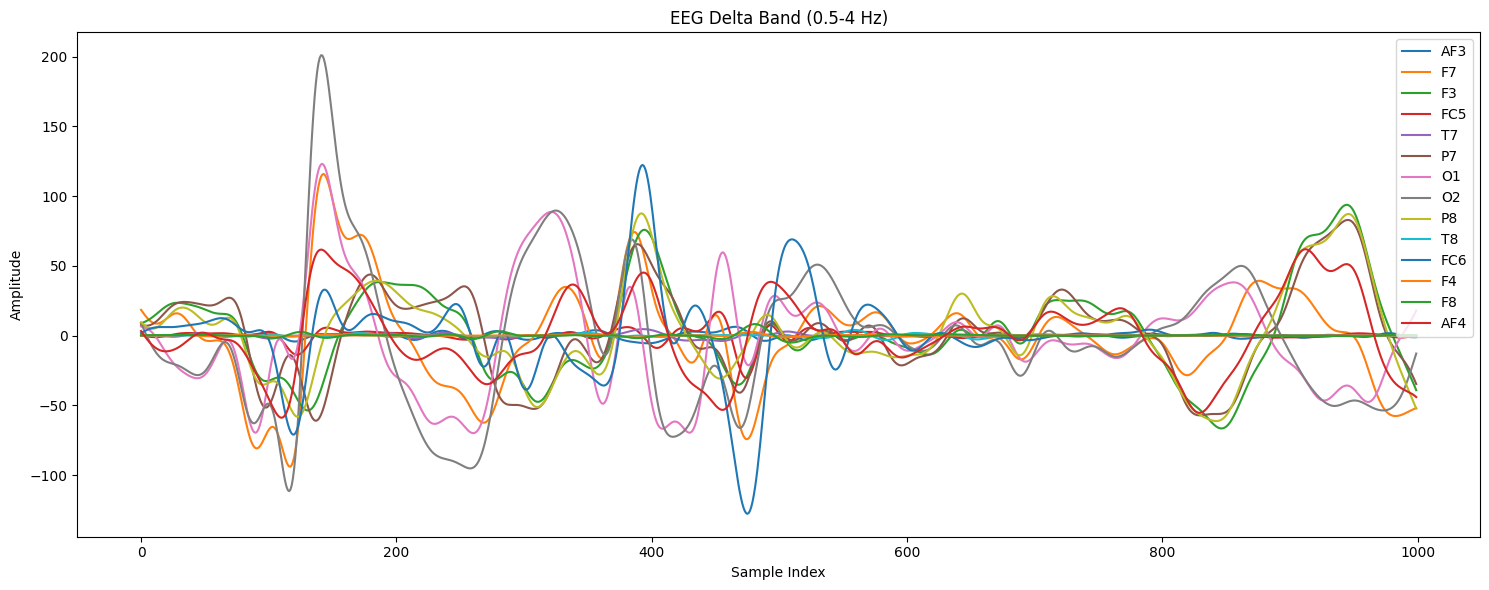

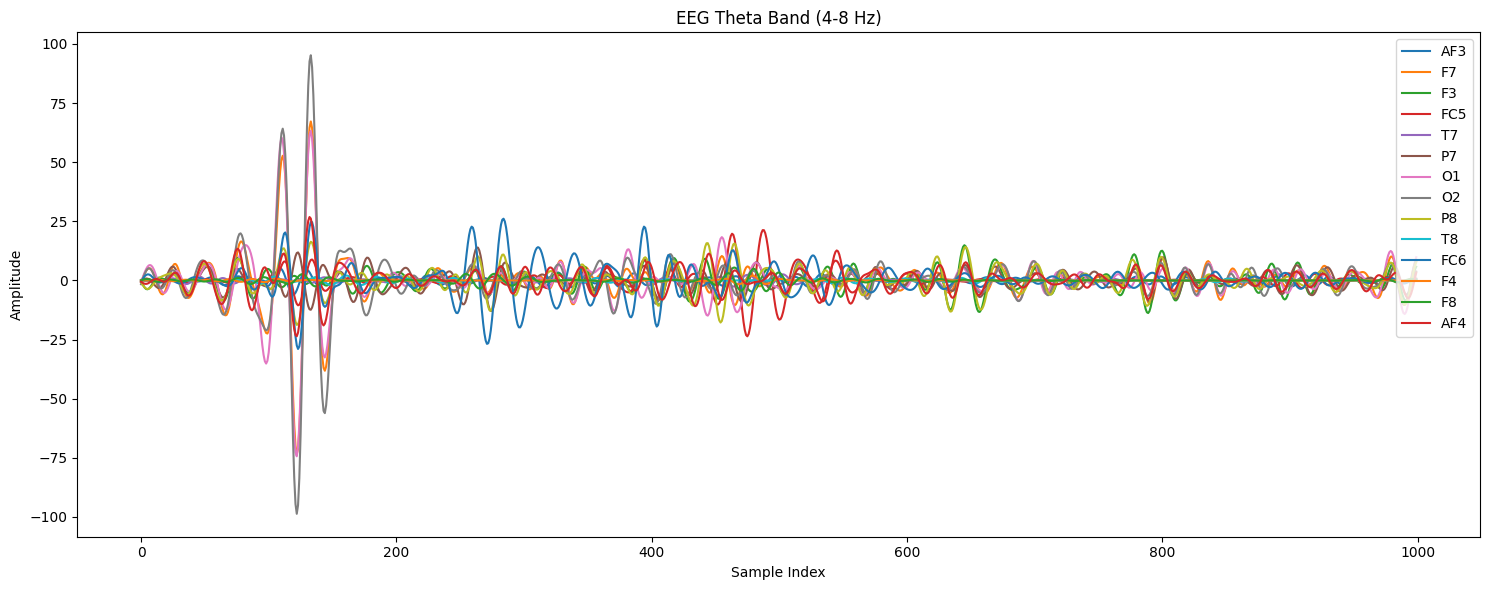

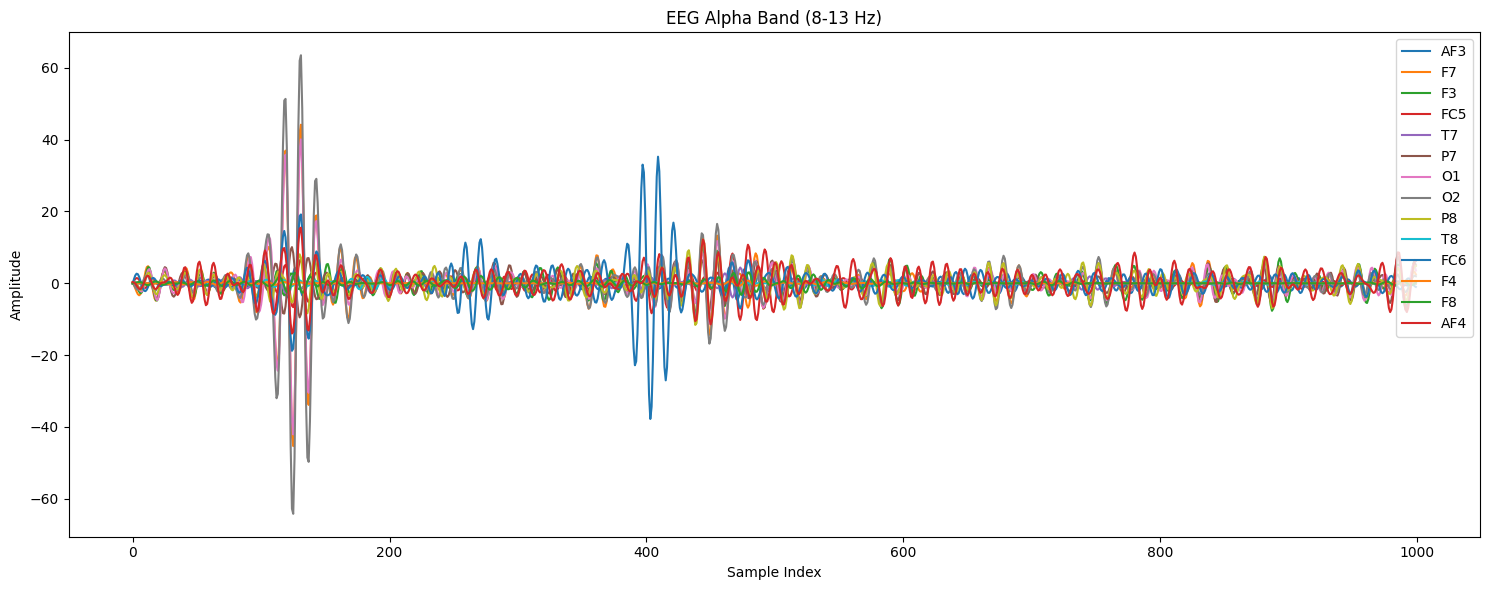

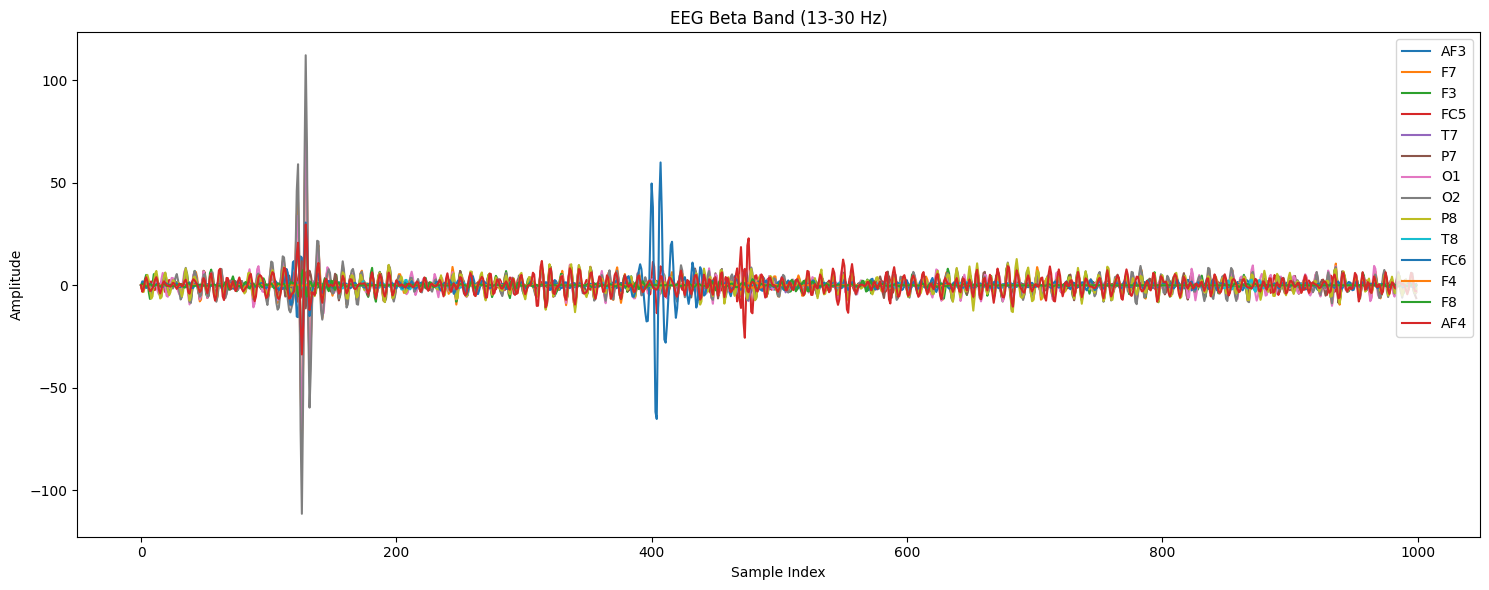

In [17]:
from scipy.signal import butter, filtfilt, iirnotch
import matplotlib.pyplot as plt

# Hàm tạo bộ lọc thông cao và thông thấp
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data, axis=0)

# Hàm tạo bộ lọc notch
def notch_filter(data, notch_freq, fs, quality_factor=30):
    nyquist = 0.5 * fs
    notch = notch_freq / nyquist
    b, a = iirnotch(notch, quality_factor)
    return filtfilt(b, a, data, axis=0)

# Lấy các cột 0 đến 13 của df
eeg_data = df.iloc[:, 0:14].values

# Lọc thông cao và thông thấp
lowcut = 0.5  # Hz
highcut = 30  # Hz
fs = 128  # Tần số lấy mẫu

filtered_data = bandpass_filter(eeg_data, lowcut, highcut, fs)

# Lọc notch để loại bỏ nhiễu 50 Hz
notch_freq = 50  # Hz
filtered_data = notch_filter(filtered_data, notch_freq, fs)

# Chuyển dữ liệu đã lọc sang DataFrame để dễ quản lý
filtered_df = pd.DataFrame(filtered_data, columns=df.columns[0:14])

# Biểu diễn tín hiệu sau khi lọc
plt.figure(figsize=(15, 6))
plt.plot(filtered_df.iloc[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
plt.title('EEG Data After Filtering (High-pass, Low-pass, Notch)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend(filtered_df.columns, loc='upper right')
plt.tight_layout()
plt.show()

# Lọc thông dải để giữ lại dải alpha (8-13 Hz) hoặc beta (13-30 Hz)
alpha_low = 8  # Hz
alpha_high = 13  # Hz
beta_low = 13  # Hz
beta_high = 30  # Hz
delta_low = 0.5
delta_high = 4
theta_low = 4
theta_high = 8 

alpha_band = bandpass_filter(filtered_df.values, alpha_low, alpha_high, fs)
beta_band = bandpass_filter(filtered_df.values, beta_low, beta_high, fs)
delta_band = bandpass_filter(filtered_df.values, delta_low, delta_high, fs)
theta_band = bandpass_filter(filtered_df.values,theta_low, theta_high, fs)

# Biểu diễn tín hiệu dải delta
plt.figure(figsize=(15, 6))
plt.plot(delta_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
plt.title('EEG Delta Band (0.5-4 Hz)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend(filtered_df.columns, loc='upper right')
plt.tight_layout()
plt.show()

# Biểu diễn tín hiệu dải theta
plt.figure(figsize=(15, 6))
plt.plot(theta_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
plt.title('EEG Theta Band (4-8 Hz)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend(filtered_df.columns, loc='upper right')
plt.tight_layout()
plt.show()

# Biểu diễn tín hiệu dải alpha
plt.figure(figsize=(15, 6))
plt.plot(alpha_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
plt.title('EEG Alpha Band (8-13 Hz)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend(filtered_df.columns, loc='upper right')
plt.tight_layout()
plt.show()

# Biểu diễn tín hiệu dải beta
plt.figure(figsize=(15, 6))
plt.plot(beta_band[:1000])  # Chỉ hiển thị 1000 mẫu đầu tiên để dễ quan sát
plt.title('EEG Beta Band (13-30 Hz)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend(filtered_df.columns, loc='upper right')
plt.tight_layout()
plt.show()


In [20]:
from scipy.signal import butter, filtfilt, iirnotch, welch
import pywt
# 2. Chia tín hiệu thành các cửa sổ thời gian ngắn hơn (2 giây)
window_size = fs * 2  # Kích thước cửa sổ là 2 giây
step_size = fs * 2  # Di chuyển cửa sổ mỗi 2 giây (không chồng lên nhau)
n_windows = len(filtered_data) // step_size  # Số lượng cửa sổ

features_list = []

# Chia tín hiệu thành các cửa sổ và trích xuất đặc trưng cho từng cửa sổ
for i in range(n_windows):
    start = i * step_size
    end = start + window_size
    window_data = filtered_data[start:end]
    
    # Trích xuất đặc trưng miền tần số sử dụng Biến đổi Fourier (PSD)
    freqs, psd = welch(window_data, fs=fs, nperseg=len(window_data))
    features = {
        'delta_power': np.sum(psd[(freqs >= 0.5) & (freqs < 4)]),
        'theta_power': np.sum(psd[(freqs >= 4) & (freqs < 8)]),
        'alpha_power': np.sum(psd[(freqs >= 8) & (freqs < 13)]),
        'beta_power': np.sum(psd[(freqs >= 13) & (freqs < 30)])
    }
    
    # Trích xuất đặc trưng miền thời gian
    features['mean'] = np.mean(window_data)
    features['variance'] = np.var(window_data)
    features['std_dev'] = np.std(window_data)
    features['skewness'] = pd.Series(window_data).skew()
    features['kurtosis'] = pd.Series(window_data).kurtosis()
    
    # Trích xuất đặc trưng miền thời gian - tần số sử dụng Biến đổi Wavelet
    coeffs = pywt.wavedec(window_data, 'db4', level=4)
    features['wavelet_energy'] = np.sum(np.square(coeffs[0]))
    # Thêm các đặc trưng vào danh sách
    features_list.append(features)

# 3. Tạo DataFrame để quản lý các đặc trưng từ tất cả các cửa sổ
features_df = pd.DataFrame(features_list)
print(features_df)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 14, using nperseg = 14
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


IndexError: boolean index did not match indexed array along dimension 0; dimension is 256 but corresponding boolean dimension is 8